# Final Project

## Load data set

In [4]:
 !pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
   ------------------------------------ --- 41.0/44.8 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 kB 1.1 MB/s eta 0:00:00


In [1]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()  # Set current directory for Kaggle config

In [5]:
# API

import kagglehub

# Download latest version
# URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?select=chest_xray

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:30<00:00, 80.5MB/s]

Extracting files...


Path to dataset files: C:\Users\harsh\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2



Validation set
Image NORMAL2-IM-1442-0001.jpeg dimensions (NORMAL): (1564, 1302)
Image NORMAL2-IM-1440-0001.jpeg dimensions (NORMAL): (1632, 1225)
Image NORMAL2-IM-1431-0001.jpeg dimensions (NORMAL): (1736, 1416)
Image NORMAL2-IM-1430-0001.jpeg dimensions (NORMAL): (1272, 1040)
Image person1954_bacteria_4886.jpeg dimensions (PNEUMONIA): (1664, 1128)
Image person1949_bacteria_4880.jpeg dimensions (PNEUMONIA): (1416, 944)
Image person1950_bacteria_4881.jpeg dimensions (PNEUMONIA): (1256, 864)
Image person1947_bacteria_4876.jpeg dimensions (PNEUMONIA): (1152, 664)


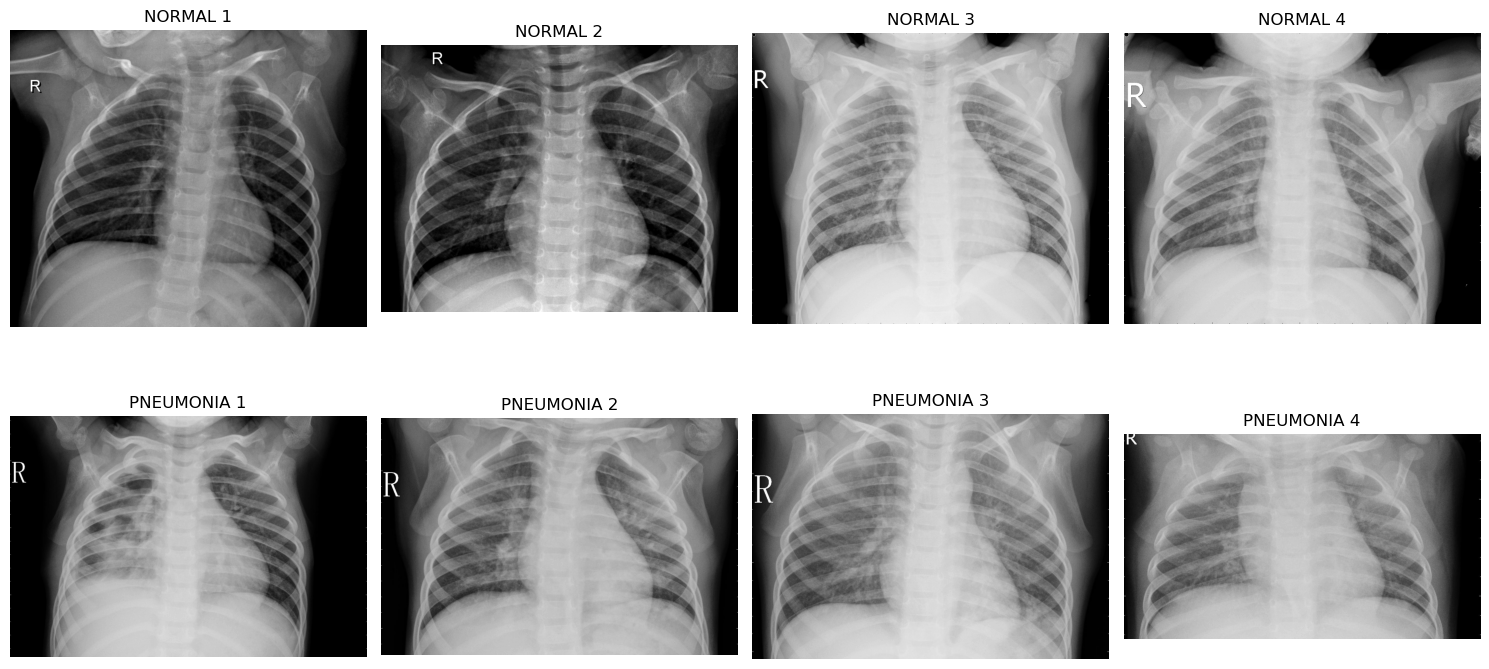

In [6]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths to the training, testing, and validation sets for normal and pneumonia images
train_normal_path = os.path.join(path, "chest_xray", "train", "NORMAL")
train_pneumonia_path = os.path.join(path, "chest_xray", "train", "PNEUMONIA")
test_normal_path = os.path.join(path, "chest_xray", "test", "NORMAL")
test_pneumonia_path = os.path.join(path, "chest_xray", "test", "PNEUMONIA")
val_normal_path = os.path.join(path, "chest_xray", "val", "NORMAL")
val_pneumonia_path = os.path.join(path, "chest_xray", "val", "PNEUMONIA")

# Get images initialized
train_normal_images = [f for f in os.listdir(train_normal_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
train_pneumonia_images = [f for f in os.listdir(train_pneumonia_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
test_normal_images = [f for f in os.listdir(test_normal_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
test_pneumonia_images = [f for f in os.listdir(test_pneumonia_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
val_normal_images = [f for f in os.listdir(val_normal_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
val_pneumonia_images = [f for f in os.listdir(val_pneumonia_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Display 4 normal vs 4 pneumonia images from the validation set
selected_val_normal_images = random.sample(val_normal_images, 4)
selected_val_pneumonia_images = random.sample(val_pneumonia_images, 4)

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

print("\nValidation set")
for i, image_name in enumerate(selected_val_normal_images):
    image_path = os.path.join(val_normal_path, image_name)
    img = Image.open(image_path)  # Load image using PIL
    print(f"Image {image_name} dimensions (NORMAL): {img.size}")  # Print image dimensions
    axes[0, i].imshow(img, cmap='gray')  # Display image
    axes[0, i].axis('off')
    axes[0, i].set_title(f"NORMAL {i+1}")

for i, image_name in enumerate(selected_val_pneumonia_images):
    image_path = os.path.join(val_pneumonia_path, image_name)
    img = Image.open(image_path)  # Load image using PIL
    print(f"Image {image_name} dimensions (PNEUMONIA): {img.size}")  # Print image dimensions
    axes[1, i].imshow(img, cmap='gray')  # Display image
    axes[1, i].axis('off')
    axes[1, i].set_title(f"PNEUMONIA {i+1}")

plt.tight_layout()
plt.show()


## Pre-processing

In [7]:
# Function to load and preprocess images from a given list of image files
def load_images(image_files, image_path, img_size=(224, 224)):
    images = []
    for img_file in image_files:
        img = image.load_img(os.path.join(image_path, img_file), target_size=img_size)
        img_array = image.img_to_array(img)  # Convert image to numpy array
        img_array = preprocess_input(img_array)
        images.append(img_array)
    return np.array(images)

# Load images
train_normal_images_data = load_images(train_normal_images, train_normal_path)
train_pneumonia_images_data = load_images(train_pneumonia_images, train_pneumonia_path)
test_normal_images_data = load_images(test_normal_images, test_normal_path)
test_pneumonia_images_data = load_images(test_pneumonia_images, test_pneumonia_path)
val_normal_images_data = load_images(val_normal_images, val_normal_path)
val_pneumonia_images_data = load_images(val_pneumonia_images, val_pneumonia_path)

# Count number of images for each category
train_normal_count = len(train_normal_images_data)
train_pneumonia_count = len(train_pneumonia_images_data)
test_normal_count = len(test_normal_images_data)
test_pneumonia_count = len(test_pneumonia_images_data)
val_normal_count = len(val_normal_images_data)
val_pneumonia_count = len(val_pneumonia_images_data)

# check if balanced (nope)
print(f"Training set - Normal images: {train_normal_count}, Pneumonia images: {train_pneumonia_count}")
print(f"Test set - Normal images: {test_normal_count}, Pneumonia images: {test_pneumonia_count}")
print(f"Validation set - Normal images: {val_normal_count}, Pneumonia images: {val_pneumonia_count}")

Training set - Normal images: 1341, Pneumonia images: 3875
Test set - Normal images: 234, Pneumonia images: 390
Validation set - Normal images: 8, Pneumonia images: 8


## Balancing the data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,          # Random rotations between -30 and 30 degrees
    width_shift_range=0.2,      # Random horizontal shifts (20% of image width)
    height_shift_range=0.2,     # Random vertical shifts (20% of image height)
    shear_range=0.2,            # Shear transformation
    zoom_range=0.2,             # Random zooms
    horizontal_flip=True,       # Random horizontal flips
    fill_mode='nearest'         # Fill pixels that are created by transformations
)

# Augment the normal images to match the number of pneumonia images
num_pneumonia_images = len(train_pneumonia_images_data)
normal_images_needed = num_pneumonia_images - len(train_normal_images_data)

# Prepare a temporary array for augmented images
augmented_normal_images = []

# Use the ImageDataGenerator to generate augmented images for normal images
for img_array in train_normal_images_data:
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, height, width, channels)
    i = 0
    # Generate augmented images and stop once we have the required number
    for batch in datagen.flow(img_array, batch_size=1):
        augmented_normal_images.append(batch[0].astype('float32'))
        i += 1
        if len(augmented_normal_images) >= normal_images_needed:
            break
    if len(augmented_normal_images) >= normal_images_needed:
        break

# Now combine the original and augmented normal images
train_normal_images_data = np.concatenate([train_normal_images_data, np.array(augmented_normal_images)])

# Check the number of images after augmentation
train_normal_count = len(train_normal_images_data)
train_pneumonia_count = len(train_pneumonia_images_data)

print(f"After balancing - Training set - Normal images: {train_normal_count}, Pneumonia images: {train_pneumonia_count}")

After balancing - Training set - Normal images: 3875, Pneumonia images: 3875


## Splitting

In [14]:
# 1. Combine normal and pneumonia images into training data
X_combined = np.concatenate([train_normal_images_data, train_pneumonia_images_data])

# 2. Create labels (0 for normal, 1 for pneumonia)
y_labels = np.array([0] * len(train_normal_images_data) + [1] * len(train_pneumonia_images_data))

# 3. Convert to categorical (one-hot encoding)
y_combined = to_categorical(y_labels)

# 4. Create train/validation/test split
from sklearn.model_selection import train_test_split

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_combined, y_combined,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Second split: separate training and validation (15% of remaining data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.15,
    random_state=42,
    shuffle=True
)

# 5. Print shapes to verify
print("\nFinal dataset shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")



Final dataset shapes:
X_train shape: (5270, 224, 224, 3)
y_train shape: (5270, 2)
X_val shape: (930, 224, 224, 3)
y_val shape: (930, 2)
X_test shape: (1550, 224, 224, 3)
y_test shape: (1550, 2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


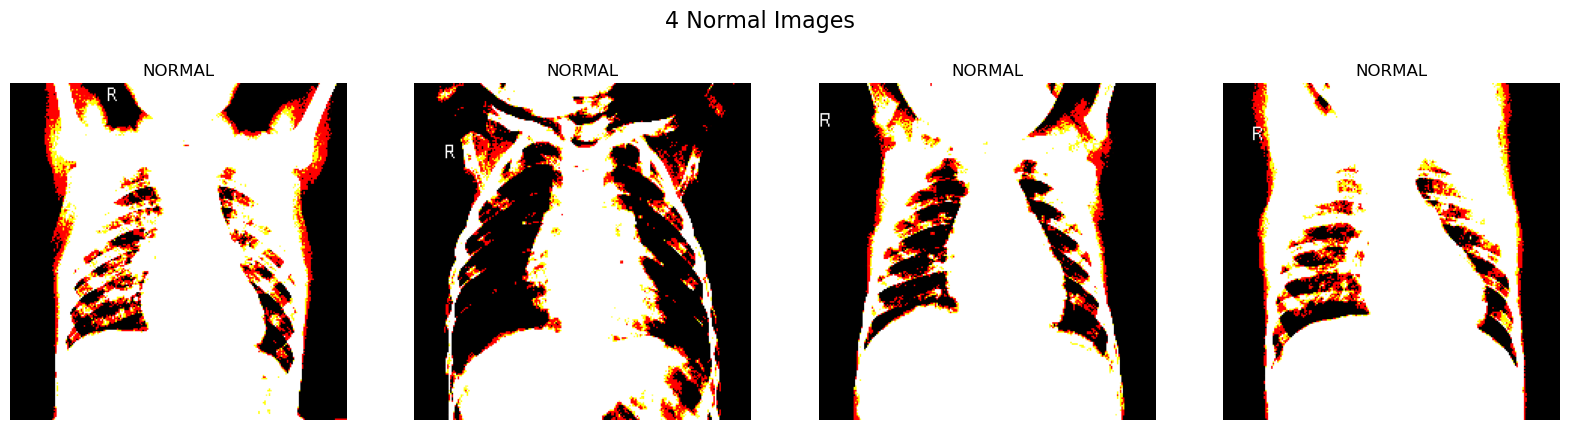

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


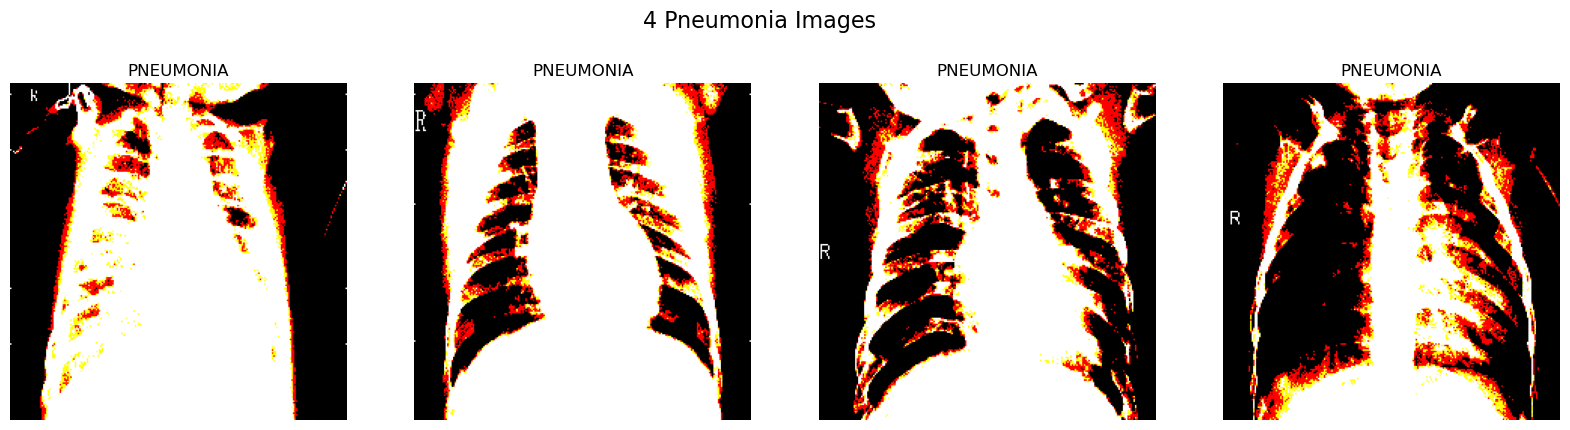

In [10]:
# Plot 4 NORMAL images in a 4x1 grid
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
normal_count = 0
for i in range(len(X_train)):
    if np.argmax(y_train[i]) == 0:  # NORMAL label
        axes[normal_count].imshow(X_train[i])  # Display NORMAL image
        axes[normal_count].axis('off')
        axes[normal_count].set_title("NORMAL")
        normal_count += 1
        if normal_count == 4:
            break
plt.suptitle("4 Normal Images", fontsize=16)
plt.show()

# Plot 4 PNEUMONIA images in a 4x1 grid
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
pneumonia_count = 0
for i in range(len(X_train)):
    if np.argmax(y_train[i]) == 1:  # PNEUMONIA label
        axes[pneumonia_count].imshow(X_train[i])  # Display PNEUMONIA image
        axes[pneumonia_count].axis('off')
        axes[pneumonia_count].set_title("PNEUMONIA")
        pneumonia_count += 1
        if pneumonia_count == 4:
            break
plt.suptitle("4 Pneumonia Images", fontsize=16)
plt.show()

# the pneumonia images are more clear after getting processed by resnet because the sample size from the source is higher.
# tried augmenting after resnet preprocessing but the results weren't better, so opted back for memory.

# CNN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

def create_balanced_cnn(input_shape=(224, 224, 3)):
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        
        # Flatten and Dense Layers
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(2, activation='softmax')  # 2 classes: Normal and Pneumonia
    ])
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create the model
model = create_balanced_cnn()

# Add early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'\nTest accuracy: {test_accuracy:.4f}')

C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 124s 736ms/step - accuracy: 0.9216 - loss: 0.2166 - val_accuracy: 0.8903 - val_loss: 0.2840
Epoch 2/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 119s 721ms/step - accuracy: 0.9633 - loss: 0.0849 - val_accuracy: 0.6978 - val_loss: 1.0234
Epoch 3/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 119s 721ms/step - accuracy: 0.9734 - loss: 0.0650 - val_accuracy: 0.7763 - val_loss: 0.7378
Epoch 4/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 118s 718ms/step - accuracy: 0.9863 - loss: 0.0374 - val_accuracy: 0.9409 - val_loss: 0.1622
Epoch 5/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 119s 721ms/step - accuracy: 0.9845 - loss: 0.0520 - val_accuracy: 0.9806 - val_loss: 0.0580
Epoch 6/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 123s 744ms/step - accuracy: 0.9849 - loss: 0.0391 - val_accuracy: 0.9226 - val_loss: 0.2725
Epoch 7/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 123s 748ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9032 - val_loss: 0.2912
Epoch 8/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 124s 750ms/step - accuracy: 0.9823 -

49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.9862 - loss: 0.0444

Test accuracy: 0.9845
Test loss: 0.0568
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98       779
   Pneumonia       0.98      0.99      0.98       771

    accuracy                           0.98      1550
   macro avg       0.98      0.98      0.98      1550
weighted avg       0.98      0.98      0.98      1550



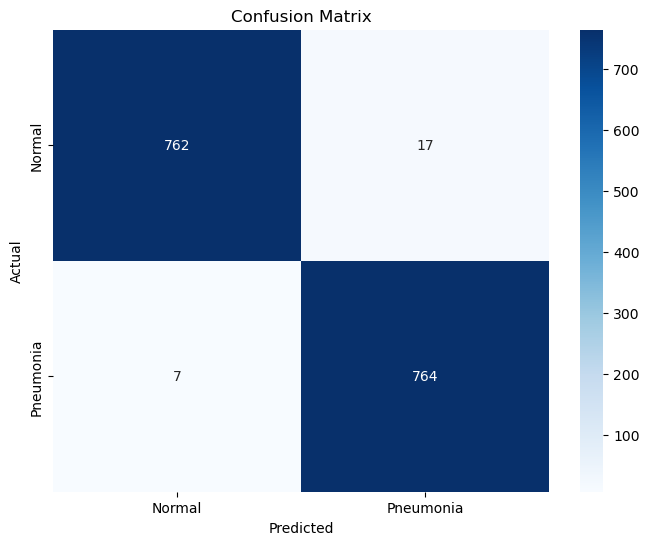

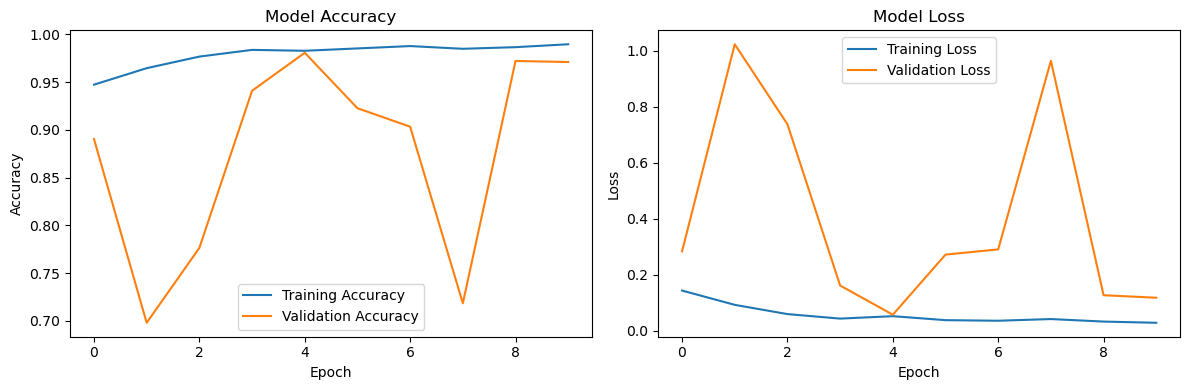

In [16]:
# 1. Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'\nTest accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

# 2. Get detailed metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=['Normal', 'Pneumonia']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculate metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes)
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Calculate specificity (true negative rate)
tn, fp, fn, tp = confusion_matrix(y_test_classes, y_pred_classes).ravel()
specificity = tn / (tn + fp)

print("\nDetailed Metrics:")
print("================")
print(f"Overall Accuracy: {accuracy:.4f}")

print("\nFor Normal Cases:")
print(f"Precision: {precision[0]:.4f}")
print(f"Recall: {recall[0]:.4f}")
print(f"F1-Score: {f1[0]:.4f}")
print(f"Specificity: {specificity:.4f}")

print("\nFor Pneumonia Cases:")
print(f"Precision: {precision[1]:.4f}")
print(f"Recall: {recall[1]:.4f}")
print(f"F1-Score: {f1[1]:.4f}")

# Calculate additional clinical metrics
sensitivity = recall[1]  # Same as recall for positive class
ppv = precision[1]      # Positive Predictive Value
npv = precision[0]      # Negative Predictive Value

print("\nClinical Metrics:")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Positive Predictive Value (PPV): {ppv:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")


Detailed Metrics:
Overall Accuracy: 0.9845

For Normal Cases:
Precision: 0.9909
Recall: 0.9782
F1-Score: 0.9845
Specificity: 0.9782

For Pneumonia Cases:
Precision: 0.9782
Recall: 0.9909
F1-Score: 0.9845

Clinical Metrics:
Sensitivity (True Positive Rate): 0.9909
Positive Predictive Value (PPV): 0.9782
Negative Predictive Value (NPV): 0.9909


In [18]:
model.save('pneumonia_model.h5')